url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" diamonds = pd.read_csv(url) 

1. ML (RF, DT, LR) 수행

2. Dense layer만 이용 FNCC 구현

3. 순환 데이터 변환후 CNN 구현



각 단계별로 수행완료후

검사받은 이후에 다음 단계 진행

In [1]:
from os import X_OK
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import warnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv", index_col=0)
df

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [4]:
# 결측치 확인
df.isnull().sum()

cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

C:\Users\akasa\AppData\Local\Temp\ipykernel_17528\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


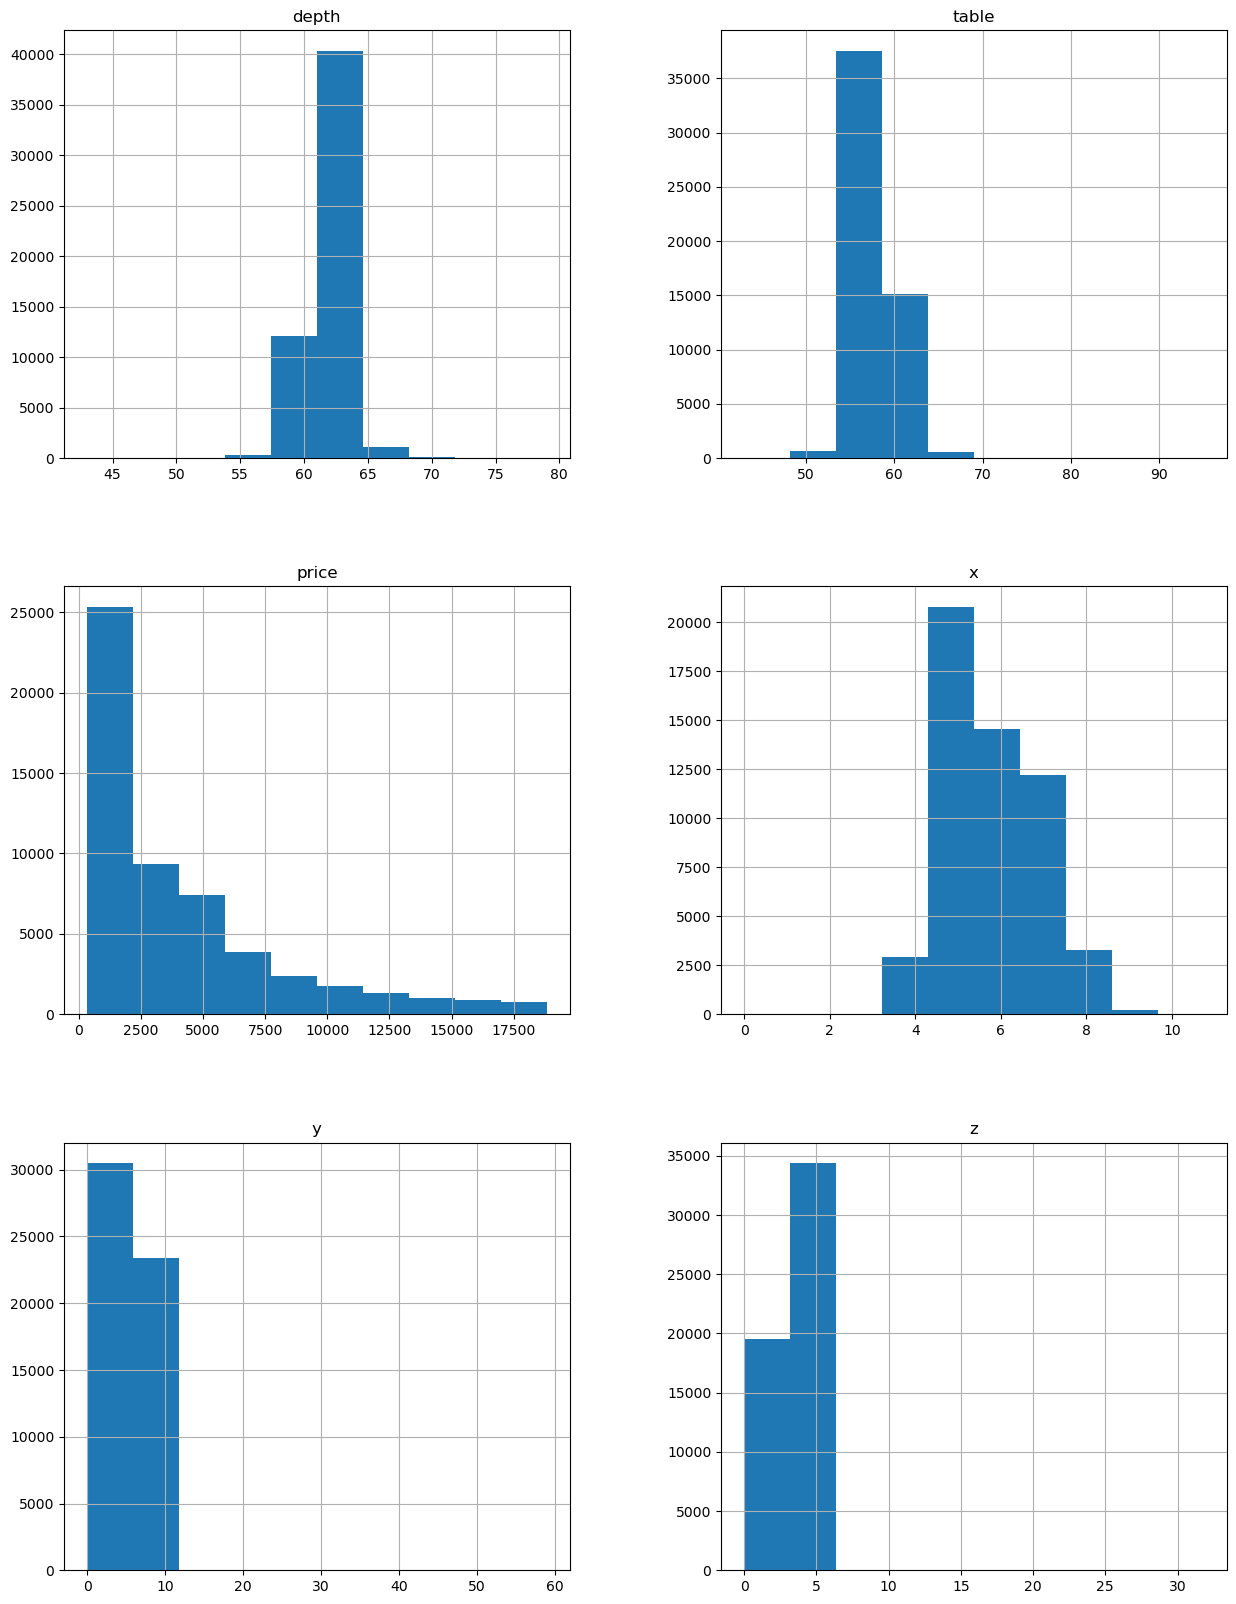

In [5]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [6]:
df.dtypes

cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [8]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [9]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [10]:
target_label = df['cut']
target_label.dtype
mapping = {'Ideal':0, 'Premium':1,'Very Good':2,'Good':3,'Fair':4}
df['cut'] = target_label.map(mapping)
df.head()

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
target_label = df['clarity']
target_label.dtype
mapping = {'SI1':0, 'VS2':1,'SI2':2,'VS1':3,'VVS2':4,'VVS1':5,'IF':6,'I1':7}
df['clarity'] = target_label.map(mapping)
df.head()

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,0,E,2,61.5,55.0,326,3.95,3.98,2.43
0.21,1,E,0,59.8,61.0,326,3.89,3.84,2.31
0.23,3,E,3,56.9,65.0,327,4.05,4.07,2.31
0.29,1,I,1,62.4,58.0,334,4.20,4.23,2.63
0.31,3,J,2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
target_label = df['color']
target_label.dtype
mapping = {'G':0, 'E':1,'F':2,'H':3,'D':4,'I':5,'J':6}
df['color'] = target_label.map(mapping)
df.head()

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43
0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63
0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, 'depth count')

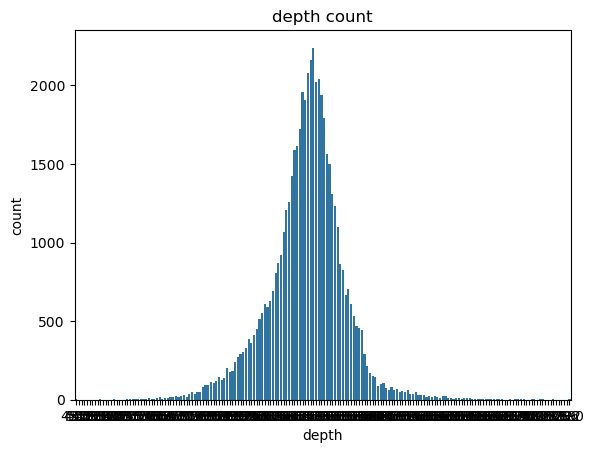

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="depth")
plt.xlabel("depth")
plt.ylabel("count")
plt.title("depth count")

Text(0.5, 1.0, 'table count')

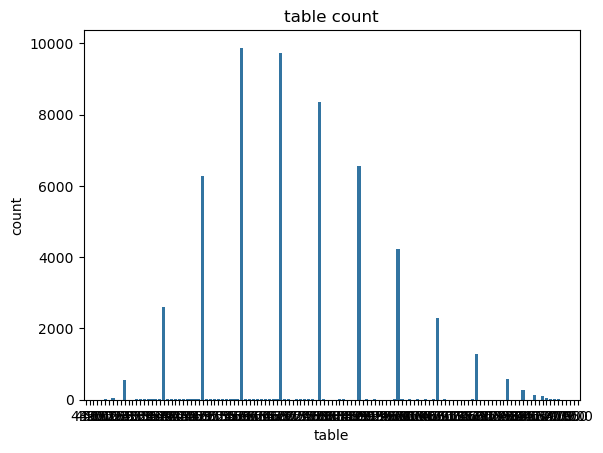

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="table")
plt.xlabel("table")
plt.ylabel("count")
plt.title("table count")

Text(0.5, 1.0, 'y count')

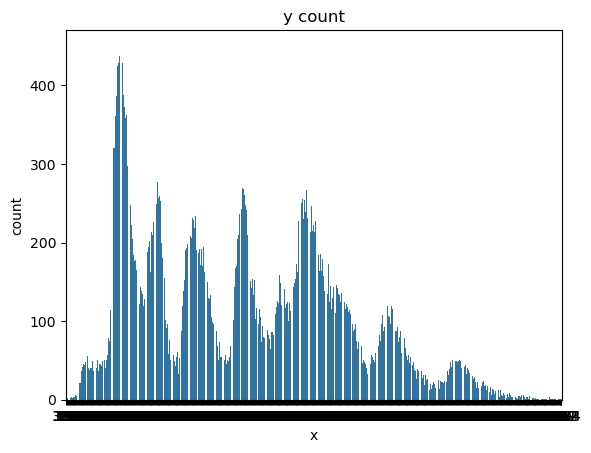

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="x")
plt.xlabel("x")
plt.ylabel("count")
plt.title("y count")

Text(0.5, 1.0, 'z count')

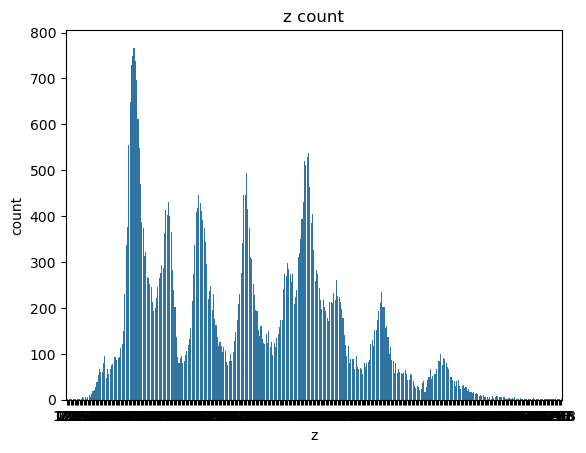

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="z")
plt.xlabel("z")
plt.ylabel("count")
plt.title("z count")

In [17]:
df['depth'].unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

In [18]:
df['depth'].min()

43.0

In [19]:
df['depth'].max()

79.0

In [20]:
df['z'].unique()

array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

In [21]:
print(df['z'].min())
print(df['z'].max())

0.0
31.8


In [22]:
data = df[(df['depth']>=43.0) & (df['depth']<=79.0)]

# depth의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_depth = sorted(data['depth'].unique())  # 고유한 값들을 정렬
encoding_map = {depth: idx for idx, depth in enumerate(unique_depth)}  # 재매핑

# 인코딩 적용
df['depth'] =data['depth'].map(encoding_map)

In [23]:
data = df[(df['z']>=0.0) & (df['z']<=31.8)]

# z의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_z = sorted(data['z'].unique())  # 고유한 값들을 정렬
encoding_map = {z: idx for idx, z in enumerate(unique_z)}  # 재매핑

# 인코딩 적용
df['z'] =data['z'].map(encoding_map)

Text(0.5, 1.0, 'depth count')

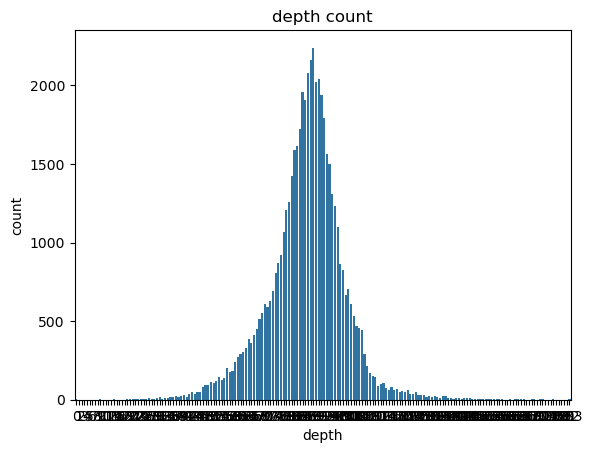

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="depth")
plt.xlabel("depth")
plt.ylabel("count")
plt.title("depth count")

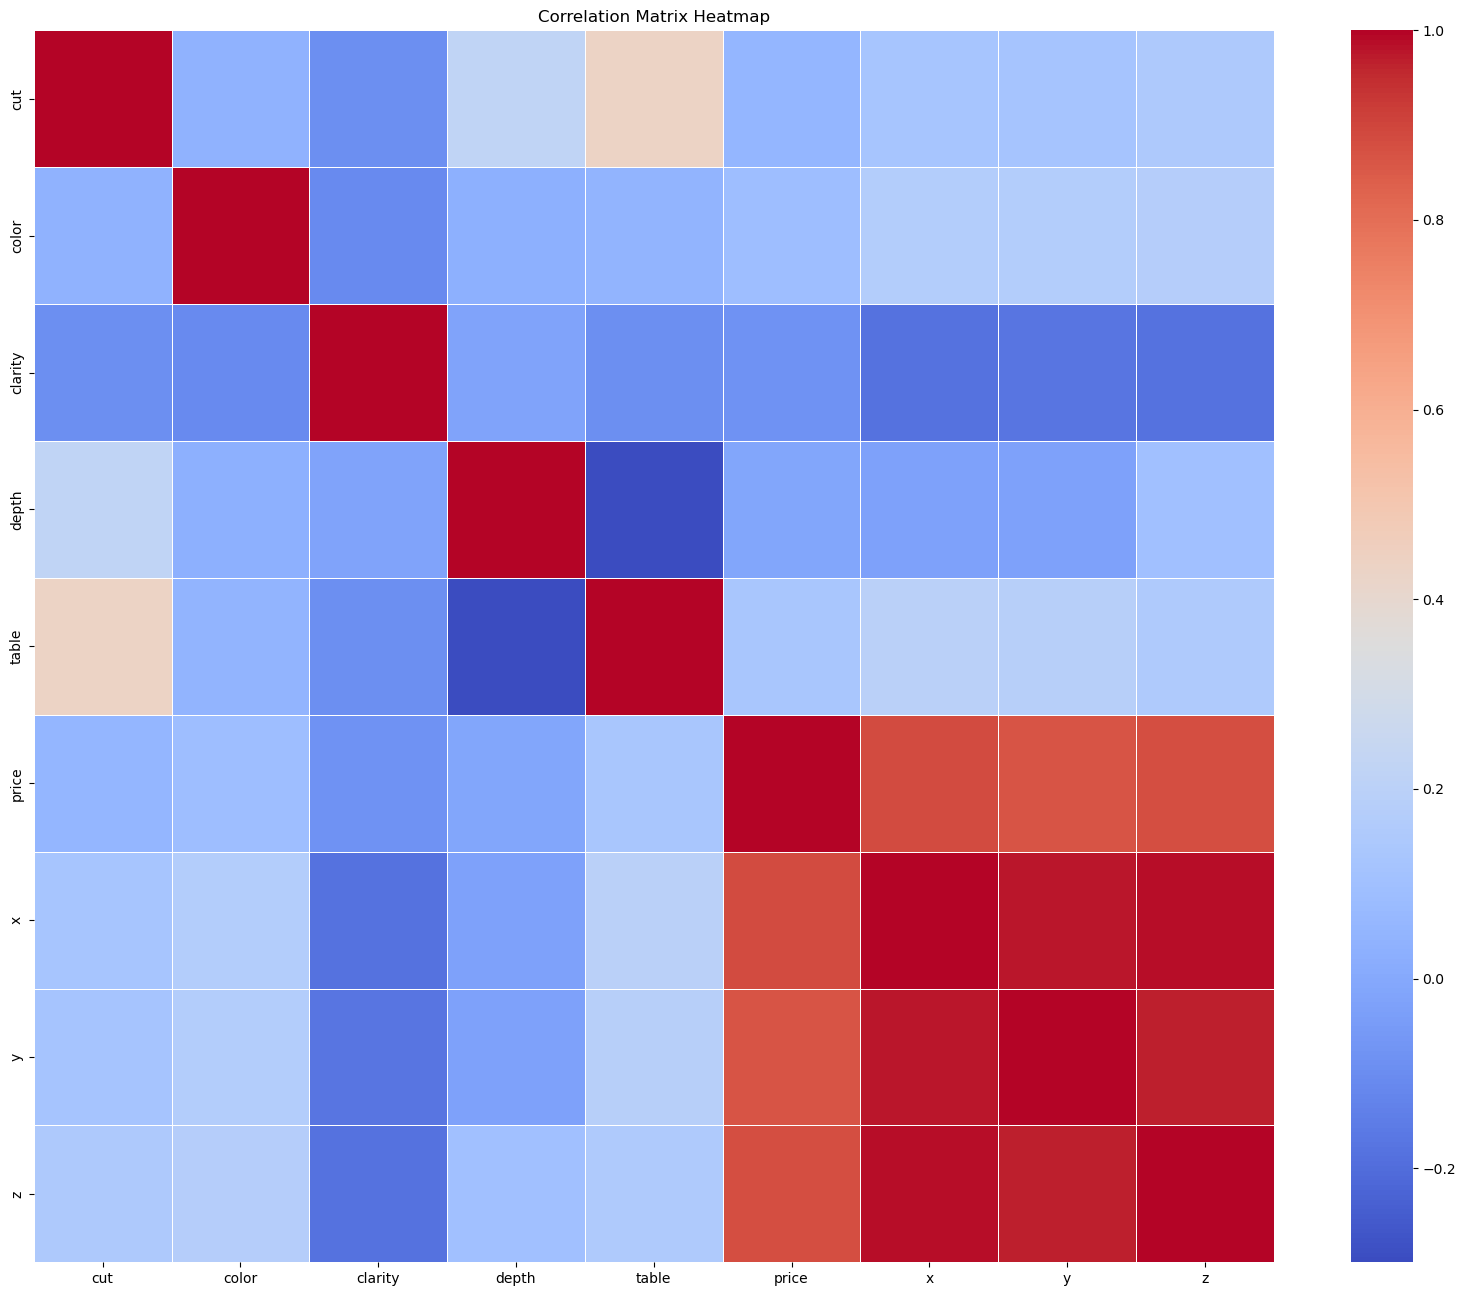

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
df.isnull().sum()

cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
df.drop(['cut','color','clarity','depth','table'],axis=1)

,price,x,y,z
carat,,,,
0.23,326,3.95,3.98,24
0.21,326,3.89,3.84,12
0.23,327,4.05,4.07,12
0.29,334,4.20,4.23,44
0.31,335,4.34,4.35,56
...,...,...,...,...
0.72,2757,5.75,5.76,131
0.72,2757,5.69,5.75,142
0.70,2757,5.66,5.68,137


In [28]:
import numpy as np
import pandas as pd

def remove_outliers(data, column):
    # 사분위수를 이용해 이상치 제거
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1  # IQR: Interquartile Range (사분위 범위)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치가 아닌 데이터만 필터링
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [29]:
df_cleaned = remove_outliers(df,df.columns)

In [30]:
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum()

cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [31]:
X =df_cleaned.drop('price',axis=1)
y = df_cleaned['price']

In [32]:
y

carat
0.23     326.0
0.21     326.0
0.29     334.0
0.31     335.0
0.24     336.0
         ...  
0.72    2757.0
0.72    2757.0
0.70    2757.0
0.86    2757.0
0.75    2757.0
Name: price, Length: 47164, dtype: float64

In [33]:
X.isnull().sum()

cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [34]:
preprocessor = StandardScaler()
# 데이터 전처리 및 분할 (이전과 동일한 방식)
X_processed = preprocessor.fit_transform(X)

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)  

In [35]:
def categorize_price(price):
    if price <= 1000:
        return 0  # 클래스 0
    else:
        return 1  # 클래스 1

# Rings 컬럼에 범주형 변환 적용
y_categorized = df_cleaned['price'].apply(categorize_price)

In [36]:
from tensorflow.keras.utils import to_categorical

# 타겟을 One-Hot Encoding으로 변환한 후 reshape
y_categorized = to_categorical(y_categorized, num_classes=2)

In [37]:
preprocessor = StandardScaler()
# 데이터 전처리 및 분할 (이전과 동일한 방식)
X_processed = preprocessor.fit_transform(X)

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y_categorized, test_size=0.2, random_state=42)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)  

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
#model 생성
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
# 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4)),  # Dropout 추가
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5)),  # Dropout 추가
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=500, batch_size=128, validation_data=(X_val, y_val), callbacks=early_stopping)
# 모델 예측
y_pred = model.predict(X_test)

# 손실 그래프 시각화
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 시각화
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 최종 정확도 출력
train_acc = model_history.history['accuracy'][-1]
val_acc = model_history.history['val_accuracy'][-1]
print(f"최종 훈련 정확도 : {train_acc:.4f}")
print(f"최종 검증 정확도 : {val_acc:.4f}")

Epoch 1/500


C:\Users\akasa\anaconda3\envs\DLA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8190 - loss: 0.3956 - val_accuracy: 0.9444 - val_loss: 0.1524
Epoch 2/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9373 - loss: 0.1649 - val_accuracy: 0.9494 - val_loss: 0.1331
Epoch 3/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.1451 - val_accuracy: 0.9511 - val_loss: 0.1315
Epoch 4/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9459 - loss: 0.1336 - val_accuracy: 0.9491 - val_loss: 0.1266
Epoch 5/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9444 - loss: 0.1338 - val_accuracy: 0.9521 - val_loss: 0.1253
Epoch 6/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9467 - loss: 0.1312 - val_accuracy: 0.9532 - val_loss: 0.1249
Epoch 7/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.1301 - val_accuracy: 0.9522 - val_loss: 0.1215
Epoch 8/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.1267 - val_accuracy: 0.9534